# Analyzing Stock Price Fluctuation of 15 Largest Banks in the USA due to COVID

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

## Top 15 largest banks in the USA as of Sept. 30, 2021 by Federal Reserve

In [3]:
bank_data = pd.read_html('https://www.bankrate.com/banking/biggest-banks-in-america/')

In [4]:
bank_data[0].head().style.hide_index()

Rank,Bank name,Total assets,Previous rank
1,JPMorgan Chase & Co.,$3.29 trillion,1.000000
2,Bank of America Corp.,$2.4 trillion,2.000000
3,Wells Fargo & Co.,$1.79 trillion,3.000000
4,Citigroup Inc.,$1.70 trillion,4.000000
5,U.S. Bancorp,$556.81 billion,5.000000


In [78]:
tickers = ['JPM', 'BAC', 'WFC', 'C', 'USB', 'TFC', 'PNC', 'GLG', 'GS', 'BK', 'COF', 'STT', 'FITB', 'HSBC', 'SIVB']

In [6]:
bank_data[0].insert(2, 'Ticker', tickers)

In [7]:
bank_data[0].style.hide_index()

Rank,Bank name,Ticker,Total assets,Previous rank
1,JPMorgan Chase & Co.,JPM,$3.29 trillion,1.000000
2,Bank of America Corp.,BAC,$2.4 trillion,2.000000
3,Wells Fargo & Co.,WFC,$1.79 trillion,3.000000
4,Citigroup Inc.,C,$1.70 trillion,4.000000
5,U.S. Bancorp,USB,$556.81 billion,5.000000
6,Truist Bank,TFC,$516.78 billion,6.000000
7,PNC Financial Services Group Inc.,PNC,$462.39 billion,7.000000
8,TD Group US Holdings LLC,GLG,$413.13 billion,8.000000
9,Goldman Sachs Group Inc.,GS,$387.38 billion,11.000000
10,Bank of New York Mellon Corp.,BK,$385.83 billion,9.000000


In [8]:
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2022, 3, 14)

In [9]:
df = data.DataReader(tickers,'yahoo', start, end)

*Read data from Yahoo Finance*

In [10]:
JPM = data.DataReader("JPM", 'yahoo', start, end)
BAC = data.DataReader("BAC", 'yahoo', start, end)
WFC = data.DataReader("WFC", 'yahoo', start, end)
C = data.DataReader("C", 'yahoo', start, end)
USB = data.DataReader("USB", 'yahoo', start, end)
TFC = data.DataReader("TFC", 'yahoo', start, end)
PNC = data.DataReader("PNC", 'yahoo', start, end)
GLG = data.DataReader("GLG", 'yahoo', start, end)
GS = data.DataReader("GS", 'yahoo', start, end)
BK = data.DataReader("BK", 'yahoo', start, end)
COF = data.DataReader("COF", 'yahoo', start, end)
STT = data.DataReader("STT", 'yahoo', start, end)
FITB = data.DataReader("FITB", 'yahoo', start, end)
HSBC = data.DataReader("HSBC", 'yahoo', start, end)
SIVB = data.DataReader("SIVB", 'yahoo', start, end)

In [11]:
bank_stocks = pd.concat([JPM, BAC, WFC, C, USB, TFC, PNC, GLG, GS, BK, COF, STT, FITB, HSBC, SIVB],axis=1,keys=tickers)

In [12]:
bank_stocks.head()

JPM                                                 \
                  High        Low        Open       Close      Volume   
Date                                                                    
2019-01-02   99.779999  95.940002   95.949997   99.309998  15670900.0   
2019-01-03   98.889999  96.690002   98.639999   97.110001  16286400.0   
2019-01-04  100.930000  98.279999   99.110001  100.690002  16935200.0   
2019-01-07  101.470001  99.709999  100.430000  100.760002  15430700.0   
2019-01-08  101.820000  99.550003  101.629997  100.570000  13578800.0   

                             BAC                                   ...  \
            Adj Close       High        Low       Open      Close  ...   
Date                                                               ...   
2019-01-02  90.111923  25.139999  24.010000  24.080000  24.959999  ...   
2019-01-03  88.831268  25.040001  24.450001  24.940001  24.559999  ...   
2019-01-04  92.106071  25.650000  25.030001  25.100000  25.580000  ...   
2019-01-07  92.170113  25.780001  25.290001  25.559999  25.559999  ...   
2019-01-08  91.996300  25.790001  25.090000  25.719999  25.510000  ...   

                 HSBC                                         SIVB  \
                 Open      Close     Volume  Adj Close        High   
Date                                                                 
2019-01-02  40.369999  40.880001  2565000.0  34.834759  196.339996   
2019-01-03  40.529999  40.430000  1479400.0  34.451305  196.220001   
2019-01-04  41.330002  41.610001  3060900.0  35.456810  201.059998   
2019-01-07  41.040001  41.049999  2212300.0  34.979614  210.009995   
2019-01-08  41.509998  41.160000  2888300.0  35.073357  208.279999   

                                                                    
                   Low        Open       Close  Volume   Adj Close  
Date                                                                
2019-01-02  186.550003  186.550003  195.839996  825400  195.839996  
2019-01-03  189.300003  194.360001  189.639999  632900  189.639999  
2019-01-04  191.509995  194.610001  200.410004  680300  200.410004  
2019-01-07  199.389999  201.720001  205.039993  821800  205.039993  
2019-01-08  201.669998  206.779999  207.059998  527200  207.059998  

[5 rows x 90 columns]

In [13]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [14]:
bank_stocks.head()

Bank Ticker         JPM                                                 \
Stock Info         High        Low        Open       Close      Volume   
Date                                                                     
2019-01-02    99.779999  95.940002   95.949997   99.309998  15670900.0   
2019-01-03    98.889999  96.690002   98.639999   97.110001  16286400.0   
2019-01-04   100.930000  98.279999   99.110001  100.690002  16935200.0   
2019-01-07   101.470001  99.709999  100.430000  100.760002  15430700.0   
2019-01-08   101.820000  99.550003  101.629997  100.570000  13578800.0   

Bank Ticker                   BAC                                   ...  \
Stock Info   Adj Close       High        Low       Open      Close  ...   
Date                                                                ...   
2019-01-02   90.111923  25.139999  24.010000  24.080000  24.959999  ...   
2019-01-03   88.831268  25.040001  24.450001  24.940001  24.559999  ...   
2019-01-04   92.106071  25.650000  25.030001  25.100000  25.580000  ...   
2019-01-07   92.170113  25.780001  25.290001  25.559999  25.559999  ...   
2019-01-08   91.996300  25.790001  25.090000  25.719999  25.510000  ...   

Bank Ticker       HSBC                                         SIVB  \
Stock Info        Open      Close     Volume  Adj Close        High   
Date                                                                  
2019-01-02   40.369999  40.880001  2565000.0  34.834759  196.339996   
2019-01-03   40.529999  40.430000  1479400.0  34.451305  196.220001   
2019-01-04   41.330002  41.610001  3060900.0  35.456810  201.059998   
2019-01-07   41.040001  41.049999  2212300.0  34.979614  210.009995   
2019-01-08   41.509998  41.160000  2888300.0  35.073357  208.279999   

Bank Ticker                                                          
Stock Info          Low        Open       Close  Volume   Adj Close  
Date                                                                 
2019-01-02   186.550003  186.550003  195.839996  825400  195.839996  
2019-01-03   189.300003  194.360001  189.639999  632900  189.639999  
2019-01-04   191.509995  194.610001  200.410004  680300  200.410004  
2019-01-07   199.389999  201.720001  205.039993  821800  205.039993  
2019-01-08   201.669998  206.779999  207.059998  527200  207.059998  

[5 rows x 90 columns]

## EDA

In [15]:
bank_stocks_max_min = pd.DataFrame({'Max': bank_stocks.xs(key='Close',axis=1,level='Stock Info').max(), 
                                    'Date Max': bank_stocks.xs(key='Close',axis=1,level='Stock Info').idxmax(),
                                    'Min': bank_stocks.xs(key='Close',axis=1,level='Stock Info').min(), 
                                    'Date Min': bank_stocks.xs(key='Close',axis=1,level='Stock Info').idxmin()})

*Find the date that each stock reached the lowest and highest close price*

In [16]:
bank_stocks_max_min.head()

,Max,Date Max,Min,Date Min
Bank Ticker,,,,
JPM,171.779999,2021-10-22,79.029999,2020-03-23
BAC,49.380001,2022-02-08,18.080000,2020-03-23
WFC,59.060001,2022-02-09,21.139999,2020-10-29
C,81.910004,2020-01-14,35.389999,2020-03-23
USB,63.250000,2022-01-14,28.930000,2020-03-23


In [17]:
bank_stocks_max_min['Date Max'].value_counts().head(1)

2022-01-14    4
Name: Date Max, dtype: int64

In [18]:
bank_stocks_max_min['Date Min'].value_counts().head(1)

2020-03-23    9
Name: Date Min, dtype: int64

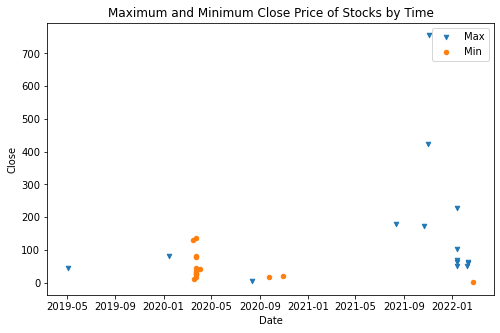

In [19]:
plt.figure(figsize=(8,5))
plt.scatter(x='Date Max', y='Max', marker='v', s= 20, data=bank_stocks_max_min)
plt.scatter(x='Date Min', y='Min', s= 20, data=bank_stocks_max_min)
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Maximum and Minimum Close Price of Stocks by Time')
plt.legend()

In [20]:
returns = pd.DataFrame()

*Create a dataframe that will contain the returns for each bank's stock*

In [21]:
for ticker in tickers:
    returns[ticker +' return'] = bank_stocks[ticker]['Close'].pct_change()

In [22]:
returns.head()

,JPM return,BAC return,WFC return,C return,USB return,TFC return,PNC return,GLG return,GS return,BK return,COF return,STT return,FITB return,HSBC return,SIVB return
Date,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.022153,-0.016026,-0.007882,-0.018121,-0.014024,-0.006758,-0.004545,0.032258,-0.014649,-0.019789,-0.014238,-0.032536,-0.000826,-0.011008,-0.031658
2019-01-04,0.036865,0.041531,0.029633,0.048896,0.024726,0.026310,0.025028,0.000000,0.032682,0.028995,0.044380,0.037834,0.023987,0.029186,0.056792
2019-01-07,0.000695,-0.000782,-0.006465,0.008707,-0.004698,0.007956,-0.002227,0.000000,0.005541,-0.002296,0.005532,0.012463,0.005654,-0.013458,0.023103
2019-01-08,-0.001886,-0.001956,-0.002099,-0.002697,0.006436,0.002412,0.001571,0.062500,-0.003693,-0.003766,0.000500,0.004308,0.005221,0.002680,0.009852


In [23]:
returns_max_min = pd.DataFrame({'Max': returns.max(), 
                                    'Date Max': returns.idxmax(),
                                    'Min': returns.min(), 
                                    'Date Min': returns.idxmin()})

In [24]:
returns_max_min.head()

,Max,Date Max,Min,Date Min
JPM return,0.180125,2020-03-13,-0.149649,2020-03-16
BAC return,0.177962,2020-03-13,-0.153973,2020-03-16
WFC return,0.145347,2020-03-24,-0.158676,2020-03-12
C return,0.179843,2020-03-13,-0.192986,2020-03-16
USB return,0.173679,2020-03-13,-0.144405,2020-03-09


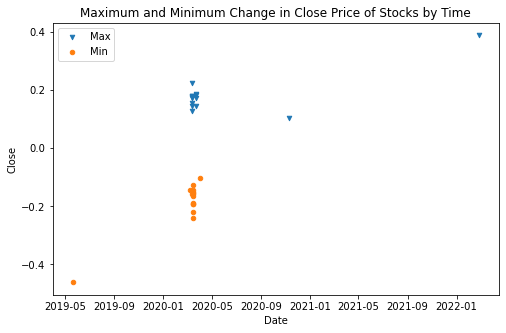

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(x='Date Max', y='Max', marker='v', s= 20, data=returns_max_min)
plt.scatter(x='Date Min', y='Min', s= 20, data=returns_max_min)
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Maximum and Minimum Change in Close Price of Stocks by Time')
plt.legend()

In [26]:
returns.head()

,JPM return,BAC return,WFC return,C return,USB return,TFC return,PNC return,GLG return,GS return,BK return,COF return,STT return,FITB return,HSBC return,SIVB return
Date,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.022153,-0.016026,-0.007882,-0.018121,-0.014024,-0.006758,-0.004545,0.032258,-0.014649,-0.019789,-0.014238,-0.032536,-0.000826,-0.011008,-0.031658
2019-01-04,0.036865,0.041531,0.029633,0.048896,0.024726,0.026310,0.025028,0.000000,0.032682,0.028995,0.044380,0.037834,0.023987,0.029186,0.056792
2019-01-07,0.000695,-0.000782,-0.006465,0.008707,-0.004698,0.007956,-0.002227,0.000000,0.005541,-0.002296,0.005532,0.012463,0.005654,-0.013458,0.023103
2019-01-08,-0.001886,-0.001956,-0.002099,-0.002697,0.006436,0.002412,0.001571,0.062500,-0.003693,-0.003766,0.000500,0.004308,0.005221,0.002680,0.009852


In [27]:
bank_data[0][bank_data[0]['Ticker'] == 'JPM']['Bank name'][0]

'JPMorgan Chase & Co.'

*Plotting distribution for each stock return*

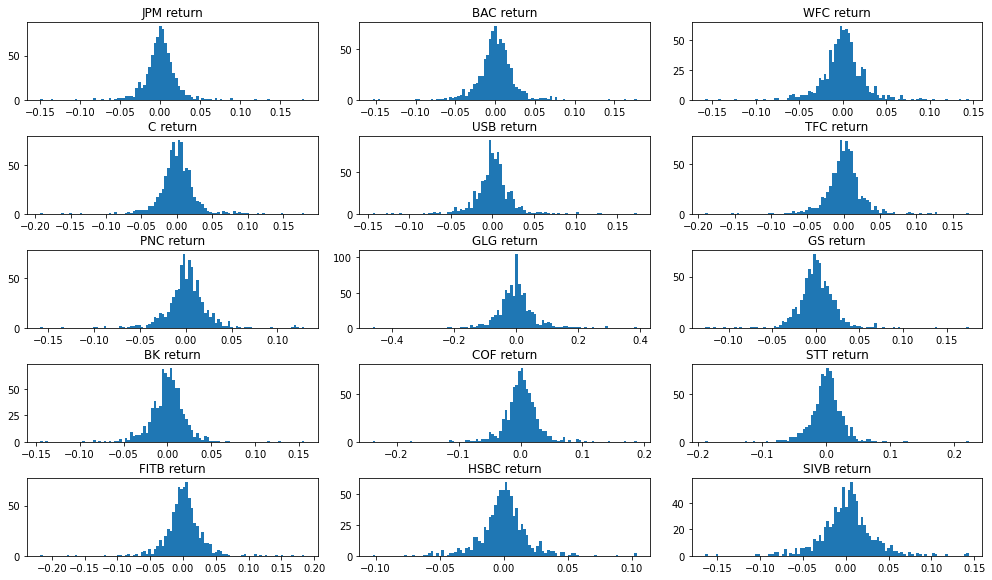

In [28]:
fig,axes = plt.subplots(nrows = 5, ncols = 3, figsize=(14,8))
plt.tight_layout(h_pad=1.5)
for ticker, ax in zip(tickers, axes.flatten()):
    ax.hist(returns[ticker +' return'], bins=100)
    ax.set_title(ticker +' return')

In [29]:
bank_stocks.head()

Bank Ticker         JPM                                                 \
Stock Info         High        Low        Open       Close      Volume   
Date                                                                     
2019-01-02    99.779999  95.940002   95.949997   99.309998  15670900.0   
2019-01-03    98.889999  96.690002   98.639999   97.110001  16286400.0   
2019-01-04   100.930000  98.279999   99.110001  100.690002  16935200.0   
2019-01-07   101.470001  99.709999  100.430000  100.760002  15430700.0   
2019-01-08   101.820000  99.550003  101.629997  100.570000  13578800.0   

Bank Ticker                   BAC                                   ...  \
Stock Info   Adj Close       High        Low       Open      Close  ...   
Date                                                                ...   
2019-01-02   90.111923  25.139999  24.010000  24.080000  24.959999  ...   
2019-01-03   88.831268  25.040001  24.450001  24.940001  24.559999  ...   
2019-01-04   92.106071  25.650000  25.030001  25.100000  25.580000  ...   
2019-01-07   92.170113  25.780001  25.290001  25.559999  25.559999  ...   
2019-01-08   91.996300  25.790001  25.090000  25.719999  25.510000  ...   

Bank Ticker       HSBC                                         SIVB  \
Stock Info        Open      Close     Volume  Adj Close        High   
Date                                                                  
2019-01-02   40.369999  40.880001  2565000.0  34.834759  196.339996   
2019-01-03   40.529999  40.430000  1479400.0  34.451305  196.220001   
2019-01-04   41.330002  41.610001  3060900.0  35.456810  201.059998   
2019-01-07   41.040001  41.049999  2212300.0  34.979614  210.009995   
2019-01-08   41.509998  41.160000  2888300.0  35.073357  208.279999   

Bank Ticker                                                          
Stock Info          Low        Open       Close  Volume   Adj Close  
Date                                                                 
2019-01-02   186.550003  186.550003  195.839996  825400  195.839996  
2019-01-03   189.300003  194.360001  189.639999  632900  189.639999  
2019-01-04   191.509995  194.610001  200.410004  680300  200.410004  
2019-01-07   199.389999  201.720001  205.039993  821800  205.039993  
2019-01-08   201.669998  206.779999  207.059998  527200  207.059998  

[5 rows x 90 columns]

In [30]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()

<AxesSubplot:title={'center':'Stock Return over Time'}, xlabel='Date'>

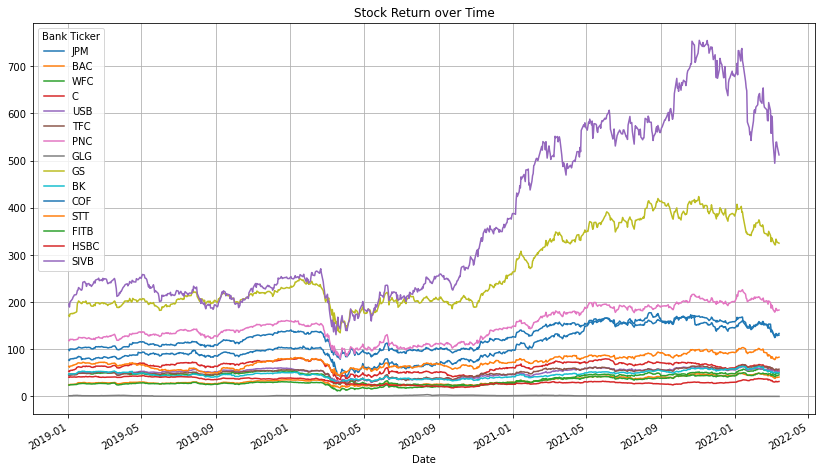

In [31]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(14,8),grid=True,title='Stock Return over Time')

*Plot 30 Days Average Return vs Close Price*

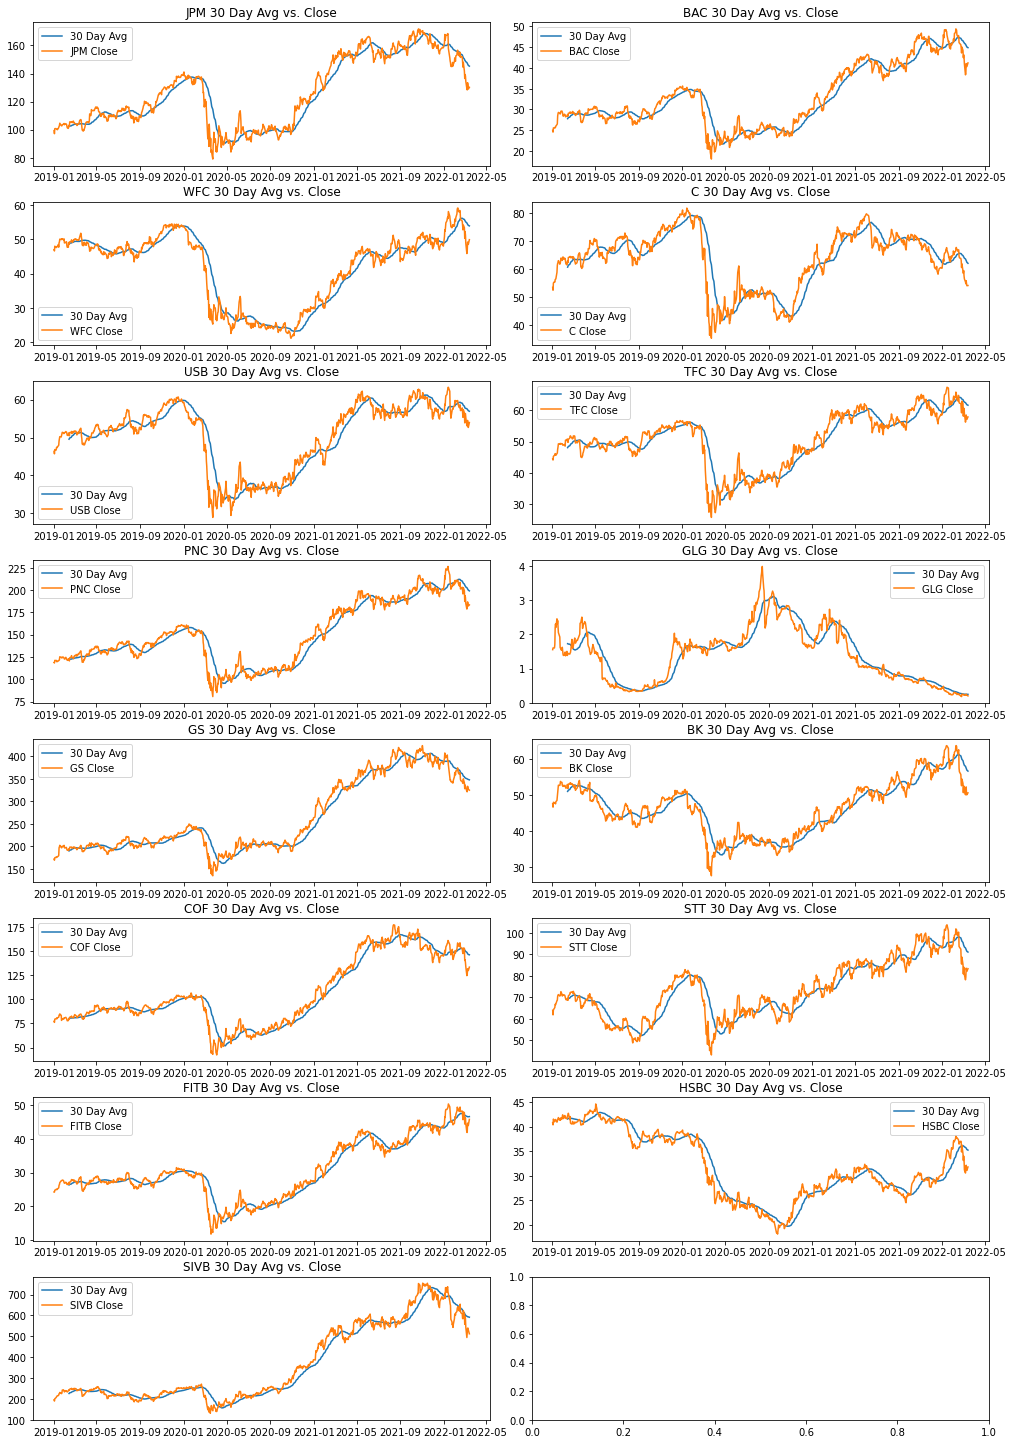

In [32]:
fig,axes = plt.subplots(nrows = 8, ncols = 2, figsize=(14,20))
plt.tight_layout(h_pad=1.5)
for ticker, ax in zip(tickers, axes.flatten()):
    ax.plot(bank_stocks[ticker, 'Close'].rolling(window=30).mean(), label='30 Day Avg')
    ax.plot(bank_stocks[ticker, 'Close'], label=ticker+' Close')
    ax.set_title(ticker +' 30 Day Avg vs. Close')
    ax.legend()

In [33]:
bank_stocks_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

In [34]:
bank_stocks_corr.head()

Bank Ticker,JPM,BAC,WFC,C,USB,TFC,PNC,GLG,GS,BK,COF,STT,FITB,HSBC,SIVB
Bank Ticker,,,,,,,,,,,,,,,
JPM,1.000000,0.955534,0.548820,0.683442,0.807409,0.898830,0.972832,-0.466787,0.941874,0.749967,0.958500,0.889568,0.931321,-0.004131,0.900428
BAC,0.955534,1.000000,0.639329,0.625691,0.818059,0.915742,0.987015,-0.547923,0.931839,0.861545,0.951909,0.926474,0.980329,0.079395,0.913522
WFC,0.548820,0.639329,1.000000,0.795220,0.891403,0.770497,0.626207,-0.721038,0.391871,0.852234,0.557621,0.467418,0.650395,0.764795,0.331836
C,0.683442,0.625691,0.795220,1.000000,0.894486,0.798632,0.649667,-0.492018,0.465782,0.675177,0.610856,0.493997,0.615580,0.576977,0.351208
USB,0.807409,0.818059,0.891403,0.894486,1.000000,0.936238,0.834551,-0.679441,0.649351,0.864061,0.786470,0.653523,0.833817,0.522941,0.585273


Text(0.5, 1.0, 'Correlation of Stock Prices of Each Bank')

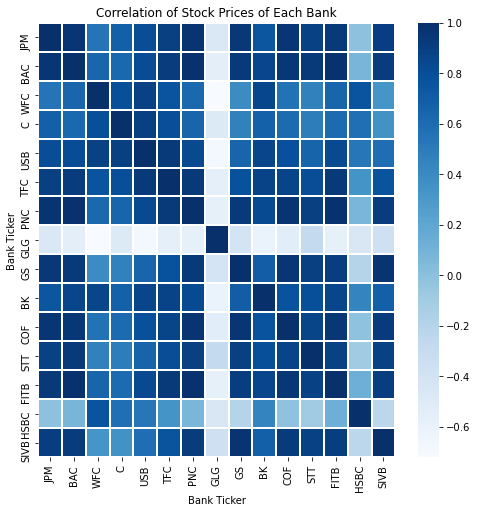

In [35]:
plt.figure(figsize=(8,8))
sns.heatmap(bank_stocks_corr,linewidths=1,linecolor='white',cmap="Blues")
plt.title('Correlation of Stock Prices of Each Bank')

<Figure size 576x576 with 0 Axes>

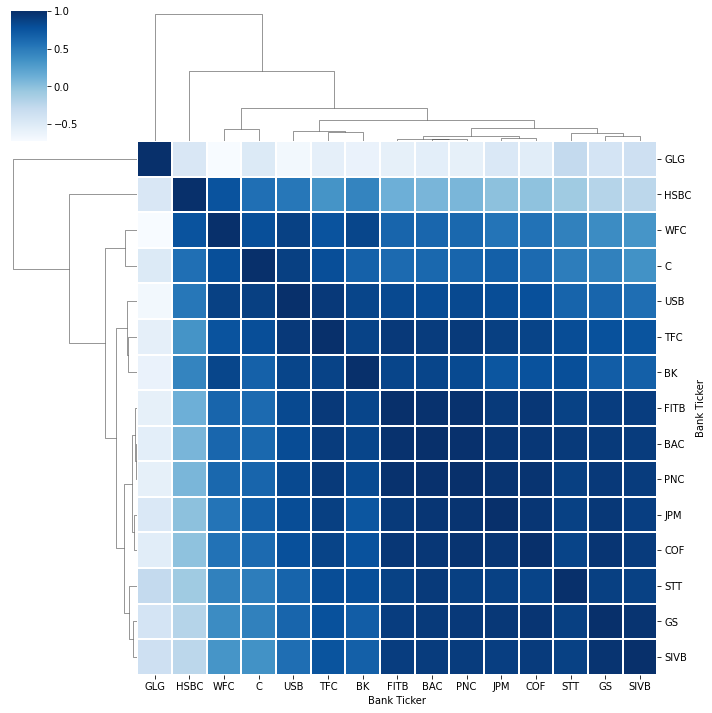

In [36]:
plt.figure(figsize=(8,8))
sns.clustermap(bank_stocks_corr,linewidths=1,linecolor='white',cmap="Blues")

## Compare impacts of Great Recession and COVID Pandemic on Stocks

In [79]:
bank_stocks_great_recession = data.DataReader(tickers,'yahoo', '2007-01-01', '2010-06-30')

C:\Users\ngoa\Anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning:

Failed to read symbol: 'GLG', replacing with NaN.



In [80]:
tickers_great_recession = tickers
tickers_great_recession.remove('GLG')

In [81]:
bank_stocks_great_recession = data.DataReader(tickers_great_recession,'yahoo', '2007-01-01', '2010-06-30')

In [82]:
bank_stocks_great_recession.head()

Attributes  Adj Close                                                          \
Symbols           JPM        BAC        WFC           C        USB        TFC   
Date                                                                            
2007-01-03  32.763416  39.919727  23.534670  426.661896  23.857811  26.019882   
2007-01-04  32.845215  40.174210  23.574183  425.194794  23.877609  25.818825   
2007-01-05  32.572575  39.852356  23.442476  422.955322  23.593969  25.475830   
2007-01-08  32.681633  40.009548  23.376629  425.117432  23.514822  25.375303   
2007-01-09  32.545307  40.046974  23.435898  421.410828  23.501629  25.327991   

Attributes                                               ...     Volume  \
Symbols           PNC          GS         BK        COF  ...        USB   
Date                                                     ...              
2007-01-03  50.692730  162.161469  30.418535  60.975231  ...  7697500.0   
2007-01-04  50.564575  160.650711  30.357214  60.904175  ...  5409000.0   
2007-01-05  49.984440  160.812271  30.211592  60.904175  ...  5748100.0   
2007-01-08  50.551086  164.593231  30.334223  61.117298  ...  5752100.0   
2007-01-09  50.665741  164.875961  30.203943  60.485851  ...  6548400.0   

Attributes                                                                    \
Symbols           TFC        PNC         GS         BK        COF        STT   
Date                                                                           
2007-01-03  1810200.0  1864400.0  6494900.0  5236908.0  3047000.0  2753000.0   
2007-01-04  1855100.0   858200.0  6460200.0  5846816.0  1461400.0  1581700.0   
2007-01-05  1529100.0   900400.0  5892900.0  4854359.0  2163900.0  1992800.0   
2007-01-08  1156900.0  1588500.0  7851000.0  3788223.0  2018900.0  1978000.0   
2007-01-09  1536000.0  2011800.0  7147100.0  4139828.0  2089600.0  2003200.0   

Attributes                                 
Symbols          FITB      HSBC      SIVB  
Date                                       
2007-01-03  1899700.0  736800.0  495800.0  
2007-01-04  1580000.0  711200.0  320800.0  
2007-01-05  3162700.0  566100.0  321400.0  
2007-01-08  3109500.0  676200.0  295700.0  
2007-01-09  1383200.0  888400.0  316000.0  

[5 rows x 84 columns]

<AxesSubplot:title={'center':'Stock Return over Time during Great Recession'}, xlabel='Date'>

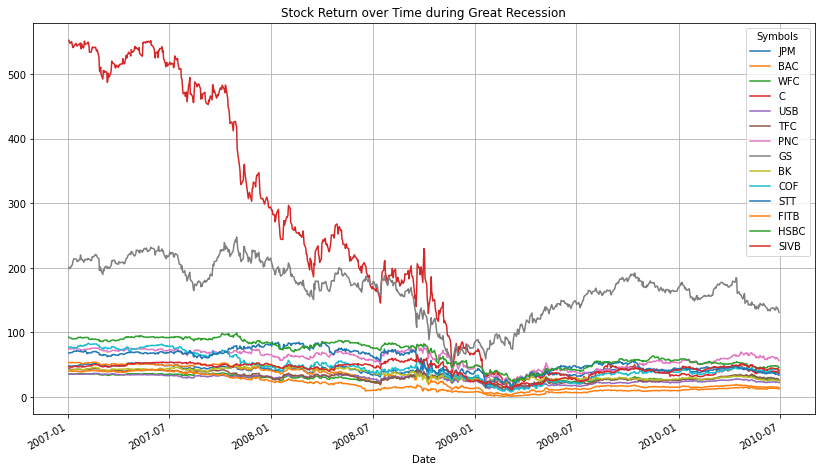

In [83]:
bank_stocks_great_recession['Close'].plot(figsize=(14,8),grid=True,title='Stock Return over Time during Great Recession')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Bank Stock Close Price During COVID Pandemic')

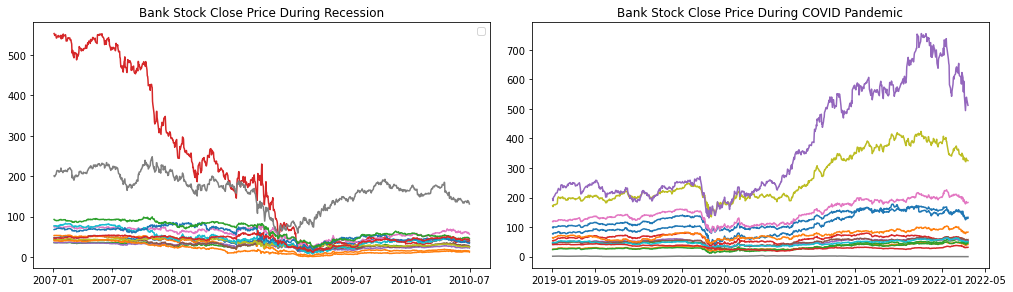

In [108]:
fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize=(14,4))
plt.tight_layout(h_pad=1.5)
axes[0].plot(bank_stocks_great_recession['Close'])
axes[0].legend()
axes[0].set_title('Bank Stock Close Price During Recession')
axes[1].plot(bank_stocks.xs(key='Close',axis=1,level='Stock Info'))
axes[1].set_title('Bank Stock Close Price During COVID Pandemic')

In [88]:
returns_great_recession = pd.DataFrame()

In [90]:
for ticker in tickers_great_recession:
    returns_great_recession[ticker +' return'] = bank_stocks_great_recession['Close'][ticker].pct_change()

In [91]:
returns_great_recession.head()

,JPM return,BAC return,WFC return,C return,USB return,TFC return,PNC return,GS return,BK return,COF return,STT return,FITB return,HSBC return,SIVB return
Date,,,,,,,,,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.002496,0.006375,0.001679,-0.003439,0.000829,-0.007727,-0.002528,-0.009316,-0.002016,-0.001165,0.007341,0.000244,-0.007529,0.007236
2007-01-05,-0.008300,-0.008012,-0.005587,-0.005267,-0.011878,-0.013284,-0.011473,0.001006,-0.004797,0.000000,-0.003061,-0.019761,-0.008887,-0.017536
2007-01-08,0.003348,0.003944,-0.002809,0.005112,-0.003355,-0.003946,0.011336,0.023512,0.004059,0.003499,0.010526,-0.006471,-0.005249,-0.003656
2007-01-09,-0.004171,0.000935,0.002535,-0.008719,-0.000561,-0.001864,0.002268,0.001718,-0.004295,-0.010332,-0.003906,0.002004,-0.009674,0.003238


In [92]:
returns_max_min_great_recession = pd.DataFrame({'Max': returns_great_recession.max(), 
                                    'Date Max': returns_great_recession.idxmax(),
                                    'Min': returns_great_recession.min(), 
                                    'Date Min': returns_great_recession.idxmin()})

In [93]:
returns_max_min_great_recession

,Max,Date Max,Min,Date Min
JPM return,0.250967,2009-01-21,-0.207274,2009-01-20
BAC return,0.352691,2009-04-09,-0.289694,2009-01-20
WFC return,0.327645,2008-07-16,-0.238223,2009-01-20
C return,0.578249,2008-11-24,-0.390244,2009-02-27
USB return,0.228412,2009-04-09,-0.181653,2009-03-05
TFC return,0.236125,2008-07-16,-0.233622,2008-09-29
PNC return,0.370909,2009-01-21,-0.413958,2009-01-20
GS return,0.264678,2008-11-24,-0.189596,2009-01-20
BK return,0.248065,2008-11-24,-0.271578,2008-09-29
COF return,0.264301,2009-04-09,-0.250420,2009-04-20


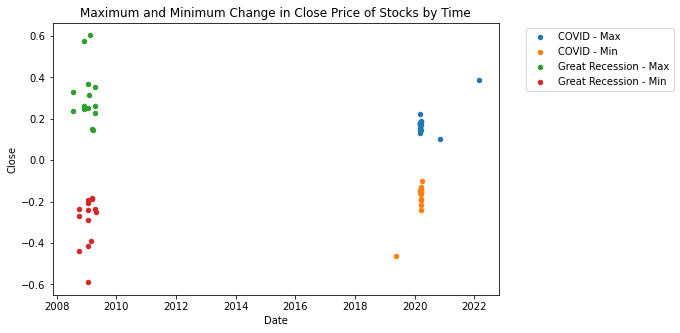

In [99]:
plt.figure(figsize=(8,5))
plt.scatter(x='Date Max', y='Max', s= 20, data=returns_max_min, label='COVID - Max')
plt.scatter(x='Date Min', y='Min', s= 20, data=returns_max_min, label='COVID - Min')
plt.scatter(x='Date Max', y='Max', s= 20, data=returns_max_min_great_recession, label='Great Recession - Max')
plt.scatter(x='Date Min', y='Min', s= 20, data=returns_max_min_great_recession, label='Great Recession - Min')

plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Maximum and Minimum Change in Close Price of Stocks by Time')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')